# CA6 - Question Answering using Bert, Albert

# Part 1 - PQuad Dataset 

Import libraries

In [11]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 7.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.8 MB/s 
     |████████████████████████████████| 140 kB 62.0 MB/s 
     |████████████████████████████████| 212 kB 61.9 MB/s 
     |████████████████████████████████| 127 kB 60.0 MB/s 
     |████████████████████████████████| 271 kB 47.5 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 144 kB 53.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasci

In [2]:
import json
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = '/content/drive/MyDrive/Sheyda/Data - QA/PQaud'

## Preprocessing Datasets

In [61]:
def json_to_dataframe(file):
    f = open ( file , "r") 
    data = json.loads(f.read())               #loading the json file.
    iid = []                                  
    tit = []                                  #Creating empty lists to store values.
    con = []
    Que = []
    ans = []
    
    for i in range(len(data['data'])):       #Root tag of the json file contains 'title' tag & 'paragraphs' list.
        for p in range(len(data['data'][i]['paragraphs'])):  # 'paragraphs' list contains 'context' tag & 'qas' list.
            context = data['data'][i]['paragraphs'][p]['context']
            for q in range(len(data['data'][i]['paragraphs'][p]['qas'])):  # 'qas' list contains 'question', 'Id' tag & 'answers' list.
                question = data['data'][i]['paragraphs'][p]['qas'][q]['question']
                Id = data['data'][i]['paragraphs'][p]['qas'][q]['id']
                answer_texts = [] 
                answer_starts = []
                for a in range(len(data['data'][i]['paragraphs'][p]['qas'][q]['answers'])): # 'answers' list contains 'ans_start', 'text' tags. 
                    answer_texts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['text'])
                    answer_starts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['answer_start'])
                    if len(answer_texts) == 0:
                      answer_texts.append('')
                      answer_starts.append(0)
                    con.append(context)
                    Que.append(question)                    # Appending values to lists
                    iid.append(Id)
                    ans.append({'text': answer_texts, 'answer_start': answer_starts })

    new_df = pd.DataFrame(columns=['id','context','question','answers']) # Creating empty DataFrame.
    new_df.id = iid
    new_df.context = con
    new_df.question = Que
    new_df.answers = ans

    return new_df

In [62]:
train_df = json_to_dataframe(os.path.join(data_path,'train_samples.json'))

In [63]:
train_df.head()

,id,context,question,answers
0,874587,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا در چه تاریخی به دنیا آمد؟,{'text': ['۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹ م...
1,874588,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا در چه تاریخی درگذشت؟,{'text': ['۱۰ جمادی‌الثانی ۱۲۴۹ ه‍.ق/۲۵ اکتبر ...
2,874589,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا که بود؟,{'text': ['نامدار به عبّاس میرزا نایِبُ‌السَّل...
3,874590,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا در چه سال‌هایی ولایتعهدی ایران و ن...,"{'text': ['سال‌های ۱۷۹۷ تا ۱۸۳۳ م'], 'answer_s..."
4,874591,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا فرزند کدام پادشاه ایران است؟,"{'text': ['فتحعلی‌شاه'], 'answer_start': [161]}"


In [64]:
test_df = json_to_dataframe(os.path.join(data_path,'test_samples.json'))
test_df.head()

,id,context,question,answers
0,1719422,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت در چه سالی تاسیس شد؟,"{'text': ['۱۸۹۹', 'سال ۱۸۹۹', 'در سال ۱۸۹۹'], ..."
1,1719422,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت در چه سالی تاسیس شد؟,"{'text': ['۱۸۹۹', 'سال ۱۸۹۹', 'در سال ۱۸۹۹'], ..."
2,1719422,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت در چه سالی تاسیس شد؟,"{'text': ['۱۸۹۹', 'سال ۱۸۹۹', 'در سال ۱۸۹۹'], ..."
3,1719423,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت دارای چند عنوان قهرمانی...,"{'text': ['یک'], 'answer_start': [54]}"
4,1719424,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت دارای چند عنوان قهرمانی...,"{'text': ['۵'], 'answer_start': [86]}"


In [65]:
val_df = json_to_dataframe(os.path.join(data_path,'validation_samples.json'))
val_df.head()

,id,context,question,answers
0,1928644,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف چیست؟,"{'text': ['یک گروه مشهور ایرلندی', 'یک گروه مش..."
1,1928644,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف چیست؟,"{'text': ['یک گروه مشهور ایرلندی', 'یک گروه مش..."
2,1928645,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف در چه تاریخی به‌طور رسمی بنیان گذاشته...,"{'text': ['۳ ژوئیه سال ۱۹۹۸', 'در ۳ ژوئیه سا..."
3,1928645,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف در چه تاریخی به‌طور رسمی بنیان گذاشته...,"{'text': ['۳ ژوئیه سال ۱۹۹۸', 'در ۳ ژوئیه سا..."
4,1928646,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف با چند عضو سال ۱۹۹۸ به ‌طور رسمی بنی...,"{'text': ['۵', 'با ۵ نفر عضو', '۵ نفر'], 'answ..."


In [66]:
from datasets import Dataset
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

In [67]:
train_ds[1]

{'answers': {'answer_start': [51],
  'text': ['۱۰ جمادی\u200cالثانی ۱۲۴۹ ه\u200d.ق/۲۵ اکتبر ۱۸۳۳ م']},
 'context': 'عبّاس میرزا (۴ ذی\u200cالحجهٔ ۱۲۰۳ ه\u200d.ق/۲۶ اوت ۱۷۸۹ م – ۱۰ جمادی\u200cالثانی ۱۲۴۹ ه\u200d.ق/۲۵ اکتبر ۱۸۳۳ م) نامدار به عبّاس میرزا نایِبُ\u200cالسَّلطَنه از شاهزادگان قاجار و فرزند فتحعلی\u200cشاه و آسیه\u200cخانم دولو بود که در فاصلهٔ سال\u200cهای ۱۷۹۷ تا ۱۸۳۳ م ولایتعهدی ایران و نیابت سلطنت پدرش در آذربایجان را بر عهده داشت. او پیش از مرگ پدرش درگذشت و پسرش محمد میرزا جانشین او شد.',
 'id': '874588',
 'question': 'عبّاس میرزا در چه تاریخی درگذشت؟'}

In [68]:
train_ds

Dataset({
    features: ['id', 'context', 'question', 'answers'],
    num_rows: 5917
})

In [69]:
train_ds['answers'][0]

{'answer_start': [13],
 'text': ['۴ ذی\u200cالحجهٔ ۱۲۰۳ ه\u200d.ق/۲۶ اوت ۱۷۸۹ م']}

## Pars Bert config

In [70]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, AutoModelForQuestionAnswering
from transformers import TrainingArguments
import transformers

In [71]:
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModelForQuestionAnswering.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

loading configuration file https://huggingface.co/HooshvareLab/bert-base-parsbert-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/d3b7c3283a6a4ad4471f59269c9de8adadfab0b05eebf49a64e046fca56cdab2.58cfea678e7bd2c1de3bfd4a5357101526b9fbc32a994b9456047e55b0afbebe
Model config BertConfig {
  "_name_or_path": "HooshvareLab/bert-base-parsbert-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}

Could not locate the tokenizer configuration file, wil

Max Length = 322

In [72]:
for i, example in enumerate(train_ds):
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > 318:
        break
example = train_ds[i]

In [73]:
example

{'answers': {'answer_start': [838],
  'text': ['ترکان عثمانی و آل جلایر و ترکمانان']},
 'context': 'امپراتوری تیموری یا امپراتوری گورکانی (۹۱۱-۷۷۱ ق/ 1506-1370م) دودمانی ترک\u200cتبار با فرهنگی ایرانی (جوامع ایرانی\u200cمآب) بود. بنیان\u200cگذار این دودمان تیمور بود که ادعا می\u200cکرد نسبش به چنگیز خان می\u200cرسد و در قبیلهٔ ترکی-مغولی برلاس به دنیا آمد. تیمور کشوری گسترده و دولتی سترگ ایجاد کرد و سرزمین ماوراءالنهر را به اهمیتی رساند که تا آن زمان هیچگاه بدان پایه نرسیده\u200cبود. او مرزهای خود را نخست در سرتاسر آسیای میانه و آنگاه سراسر خراسان و آنگاه به همهٔ بخش\u200cهای ایران و امپراتوری عثمانی و بخش\u200cهایی از هندوستان گسترش داد. از آنجایی که فتوحات تیمور بیشتر جنبهٔ یورش و هجوم داشت تا تسخیر واقعی، اغلب این مناطق باز به زودی از تصرف تیموریان خارج شد. با این حال ماوراءالنهر مدتی مرکز دولتی شد که بیشتر ایران و افغانستان را افزون بر ماوراءالنهر در بر می\u200cگرفت. هنگامی که کشور گسترده تیموری تجزیه شد، دورهٔ هرج و مرج به پیش آمد. به محض اینکه تیمور مرد، ترکان عثمانی و ا

In [74]:
len(tokenizer(example["question"], example["context"])["input_ids"])

322

In [75]:
max_length = 300 # The maximum length of a feature (question and context)

In [76]:
def prepare_train_features(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        # stride=stride,
        # return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )
  
    offset_mapping = inputs.pop("offset_mapping")
    # sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        # sample_idx = sample_map[i]
        answer = answers[i]
        
        if answer['text'][0] == '':
           start_positions.append(0)
           end_positions.append(0)
           continue
        
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [77]:
tokenized_train = train_ds.map(prepare_train_features, batched=True, remove_columns=train_ds.column_names)

  0%|          | 0/6 [00:00<?, ?ba/s]

In [78]:
tokenized_val = val_ds.map(prepare_train_features, batched=True, remove_columns=val_ds.column_names)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [79]:
train_ds.column_names

['id', 'context', 'question', 'answers']

In [80]:
def preprocess_test_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        # stride=stride,
        # return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    # sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        # sample_idx = sample_map[i]
        # example_ids.append(examples["id"][i])
        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    # inputs["example_id"] = example_ids
    return inputs

In [81]:
dataset_test_preprocessed = test_ds.map(
    preprocess_test_examples,
    batched=True,
    remove_columns=['context', 'answers', 'question'],
)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [82]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [83]:
from datasets import load_metric
metric = load_metric("squad")

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,

)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5917
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2220


Epoch,Training Loss,Validation Loss
1,1.996600,1.281114
2,1.047800,1.276727


***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-740
Configuration saved in bert-finetuned-squad/checkpoint-740/config.json
Model weights saved in bert-finetuned-squad/checkpoint-740/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-740/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-740/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-1480
Configuration saved in bert-finetuned-squad/checkpoint-1480/config.json
Model weights saved in bert-finetuned-squad/checkpoint-1480/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-1480/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-1480/special_tokens_map.json


In [ ]:
trainer.save_model("test-squad-trained")

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.834100, 0.713400,0.394800	], 'b-o', label="Training")
plt.plot([1.162066, 1.146545, 1.457134], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()


In [ ]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


In [ ]:
b

In [ ]:
from tqdm.auto import tqdm

import collections

import numpy as np

n_best = 1000
max_answer_length = 50


def compute_metrics(start_logits, end_logits, features, examples):
    # example_to_features = collections.defaultdict(list)
    # for idx, feature in enumerate(features):
        # example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for i, example in enumerate(examples):
        example_id = example["id"]
        context = example["context"]
        answers = []
        start_logit = start_logits[i]
        end_logit = end_logits[i]
        offsets = features[i]["offset_mapping"]
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        for start_index in start_indexes:
            for end_index in end_indexes:
                # Skip answers that are not fully in the context
                if offsets[start_index] is None or offsets[end_index] is None:
                    continue
                # Skip answers with a length that is either < 0 or > max_answer_length
                if (
                    end_index < start_index
                    or end_index - start_index + 1 > max_answer_length
                ):
                    continue

                answer = {
                    "text": context[offsets[start_index][0] : offsets[end_index][1]],
                    "logit_score": start_logit[start_index] + end_logit[end_index],
                }
                answers.append(answer)

        # Loop through all features associated with that example
        # for feature_index in example_to_features[example_id]:
            # start_logit = start_logits[feature_index]
            # end_logit = end_logits[feature_index]
            # offsets = features[feature_index]["offset_mapping"]

            
        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    theoretical_answers = [{"id": ex["id"], "answers": ex["answers"]} for ex in examples]
    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

In [ ]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


## َAlbert Config

In [56]:
config = AutoConfig.from_pretrained("m3hrdadfi/albert-fa-base-v2")
tokenizer = AutoTokenizer.from_pretrained("m3hrdadfi/albert-fa-base-v2")
model = AutoModelForQuestionAnswering.from_pretrained("m3hrdadfi/albert-fa-base-v2")

loading configuration file https://huggingface.co/m3hrdadfi/albert-fa-base-v2/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/f5aaead9ced50a1f22c1c73f573769815bde66573e66266a4c7c97c45ef53bc2.ea9ed90d31148db706934d7bf78ea741ea55723122dd930e1c7b974b16e37057
Model config AlbertConfig {
  "_name_or_path": "m3hrdadfi/albert-fa-base-v2",
  "architectures": [
    "AlbertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "down_scale_factor": 1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "gap_size": 0,
  "hidden_act": "gelu_new",
  "hidden_dropout_prob": 0,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "albert",
  "net_structure_type": 0,
  "num_attention_heads": 12,
  "num_hidden_groups": 1,
  "num_hidden_layers": 12,
  "num_memory_blocks": 0,
  "pad_token_id": 0,
  "

ValueError: ignored

In [ ]:
os.system('CUDA_LAUNCH_BLOCKING=1')

In [ ]:
from transformers import Trainer
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    # fp16=True,
    # push_to_hub=False,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer
)
trainer.train()

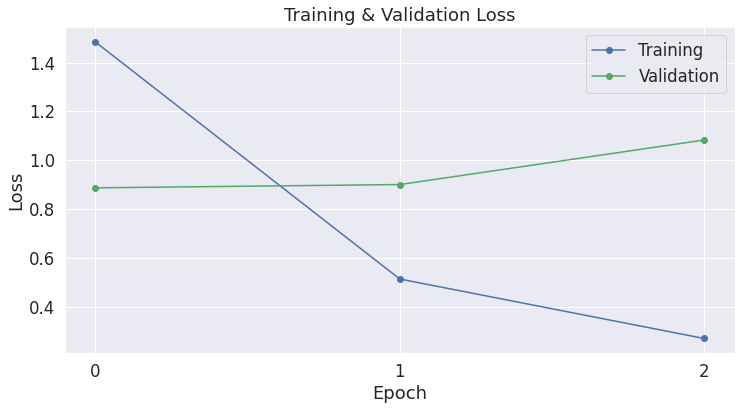

In [57]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.484000	, 0.514900,0.271800		], 'b-o', label="Training")
plt.plot([0.887569, 0.901105, 1.083094], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()

In [58]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


The following columns in the test set don't have a corresponding argument in `BertForQuestionAnswering.forward` and have been ignored: Id, offset_mapping. If Id, offset_mapping are not expected by `BertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1048
  Batch size = 8


In [59]:
b

{'test_runtime': 13.5616,
 'test_samples_per_second': 77.277,
 'test_steps_per_second': 9.66}

In [60]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


{'exact_match': 64.2175572519084, 'f1': 84.74500186088949}